# ANOVA

The objective today is to perform some explanatory analysis using variance and covariance analysis to identify the impacting features of a quantitative variable. We rely on the statsmodels library: https://www.statsmodels.org/dev/gettingstarted.html

This TP is largely inspired from https://asardell.github.io/statistique-python/




## One-way anova

Let's consider the following Hotdogs dataset including the calories and sodium levels that could be explained by the hotdog type.

In [1]:
import pandas as pd
df = pd.read_csv("./Hotdogs.csv", sep = ";")
df.head()

,Type,Calories,Sodium
0,Beef,186,495
1,Beef,181,477
2,Beef,176,425
3,Beef,149,322
4,Beef,184,482


What are the modalities of the explanatory variable?

In [7]:
#ETU
df["Type"].unique()

array(['Beef', 'Meat', 'Poultry'], dtype=object)

Generate a boxplot to see the calories distribution by type. Interpret

<Axes: title={'center': 'Calories'}, xlabel='Type'>

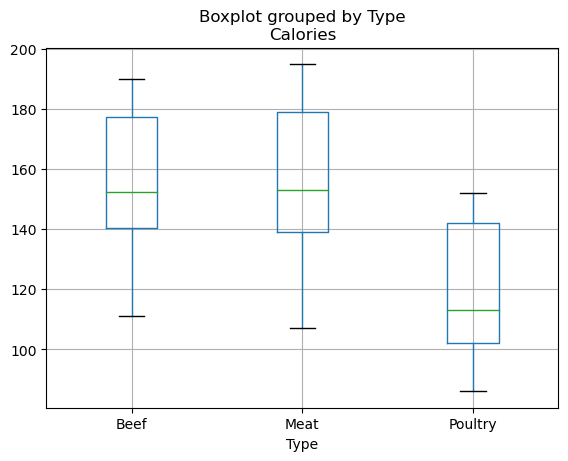

In [4]:
#ETU
df.boxplot(column = "Calories", by = "Type")

<Axes: title={'center': 'Sodium'}, xlabel='Type'>

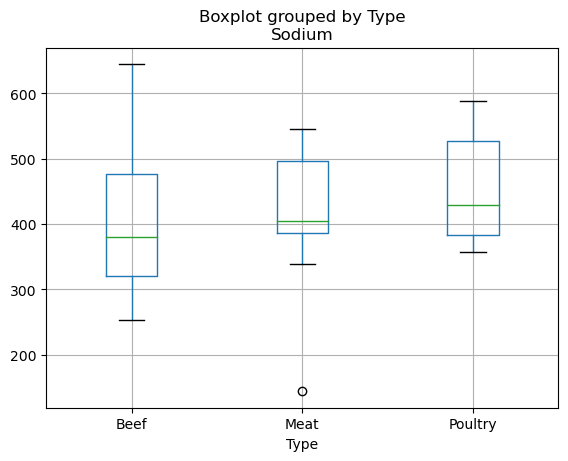

In [29]:
#ETU
df.boxplot(column = "Sodium", by = "Type")

We are going to demonstrate the equality of variances. Display the variance by type level.

In [16]:
#ETU
var_beef = df[df["Type"] == "Beef"]["Calories"].var()
var_meat = df[df["Type"] == "Meat"]["Calories"].var()
var_poultry = df[df["Type"] == "Poultry"]["Calories"].var()

print("Variance of beef hotdogs: ", var_beef)
print("Variance of meat hotdogs: ", var_meat)
print("Variance of poultry hotdogs: ", var_poultry)

Variance of beef hotdogs:  512.6605263157895
Variance of meat hotdogs:  636.845588235294
Variance of poultry hotdogs:  508.56617647058823


Apply the Bartlett test to demonstrate the variance equality.

In [15]:
from scipy.stats import bartlett 

stat_bm , p_value_bm = bartlett(df["Calories"][df["Type"] == "Beef"], df["Calories"][df["Type"] == "Meat"])
stat_bp , p_value_bp = bartlett(df["Calories"][df["Type"] == "Beef"], df["Calories"][df["Type"] == "Poultry"])
stat_mp , p_value_mp = bartlett(df["Calories"][df["Type"] == "Meat"], df["Calories"][df["Type"] == "Poultry"])

if p_value_bm < 0.05:
    print("Beef and Meat have different variances")
    print(p_value_bm)
else:
    print("Beef and Meat have the same variance")
    print(p_value_bm)

if p_value_bp < 0.05:
    print("Beef and Poultry have different variances")
    print(p_value_bp)
else:
    print("Beef and Poultry have the same variance")
    print(p_value_bp)
if p_value_mp < 0.05:
    print("Meat and Poultry have different variances")
    print(p_value_mp)
else:
    print("Meat and Poultry have the same variance")
    print(p_value_mp)

Beef and Meat have the same variance
0.655163098205384
Beef and Poultry have the same variance
0.9868575529959814
Meat and Poultry have the same variance
0.6581060291516032


In [18]:
stat , p_value = bartlett(df["Calories"][df["Type"] == "Beef"], df["Calories"][df["Type"] == "Meat"], df["Calories"][df["Type"] == "Poultry"])

if p_value < 0.05:
    print("All types have different variances")
    print(p_value)
else:
    print("All types have the same variance")
    print(p_value)

All types have the same variance
0.8748884496460629


Let's demonstrate the normalisation of residuals components using the Shapiro test.

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

model = ols("Calories ~ Type", data = df).fit()

# Résidus de la régression
residus = model.resid

# Test de Shapiro-Wilk
statistique, p_valeur = shapiro(residus)

print('Statistique de test:', statistique)

if p_valeur < 0.05:
    print('La p_valeur est', p_valeur, ', les résidus ne suivent pas une loi normale')
else:
    print('La p_valeur est', p_valeur, ', les résidus suivent une loi normale')

# Test sur les valeurs non residuelles
statistique, p_valeur = shapiro(df["Calories"])

if p_valeur < 0.05:
    print('La p_valeur est', p_valeur, ', les valeurs ne suivent pas une loi normale')
else:
    print('La p_valeur est', p_valeur, ', les valeurs suivent une loi normale')

Statistique de test: 0.9419925808906555
La p_valeur est 0.01129539217799902 , les résidus ne suivent pas une loi normale
La p_valeur est 0.04905758798122406 , les valeurs ne suivent pas une loi normale


Apply an ANOVA on the following data using the adapted library: https://www.statsmodels.org/stable/anova.html

Conclude on the impact of the type on the calories.

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Calories ~ Type", data = df).fit()
anova_table = anova_lm(model)
print(anova_table)

            df        sum_sq      mean_sq          F    PR(>F)
Type       2.0  17692.195098  8846.097549  16.073993  0.000004
Residual  51.0  28067.138235   550.336044        NaN       NaN


We would like to compare the different modalities with each other to identify which ones are similar/different regarding the Calories trend. For this purpose, we use:


*  MultiComparison to set the observed variables https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html
*  The tukey's range test to compare the modalities https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.tukeyhsd.html#statsmodels.sandbox.stats.multicomp.MultiComparison.tukeyhsd



In [27]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df["Calories"], df["Type"])

result = mc.tukeyhsd(alpha = 0.05)

print(result.summary())


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower    upper   reject
-------------------------------------------------------
  Beef    Meat   1.8559 0.9688 -16.8255  20.5373  False
  Beef Poultry -38.0853    0.0 -56.7667 -19.4039   True
  Meat Poultry -39.9412    0.0 -59.3652 -20.5172   True
-------------------------------------------------------


Do you have the same conclusion regarding the sodium values explained by the type?

In [28]:
mc = MultiComparison(df["Sodium"], df["Type"])

result = mc.tukeyhsd(alpha = 0.05)

print(result.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower    upper   reject
-------------------------------------------------------
  Beef    Meat  17.3794  0.843 -57.8581  92.6169  False
  Beef Poultry    57.85  0.162 -17.3875 133.0875  False
  Meat Poultry  40.4706 0.4304 -37.7576 118.6988  False
-------------------------------------------------------


## Two-way anova

Let's consider the following ToothGrowth dataset in which we study the length of odontoblasts (cells responsible for tooth growth) in 60 guinea pigs. Each animal received one of three doses of vitamin C (0.5, 1 and 2 mg / day) by one of two administration methods, orange juice or ascorbic acid (a form of vitamin C and coded VC).

Our dataset includes the following variables:
* len: tooth length
* supp: supplement (VC or OJ).
* dose: dose in milligrams / day

In [30]:
df = pd.read_csv("./ToothGrowth.csv")
df.head(3)

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5


Study the distribution of the len variable regarding each axplanatory factor (boxplot, bartlett test, ...)

<Axes: title={'center': 'len'}, xlabel='dose'>

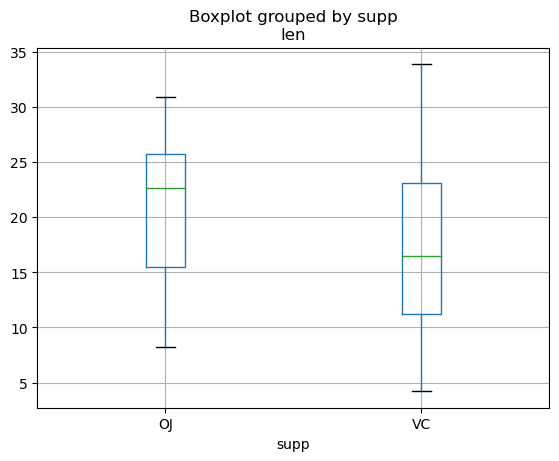

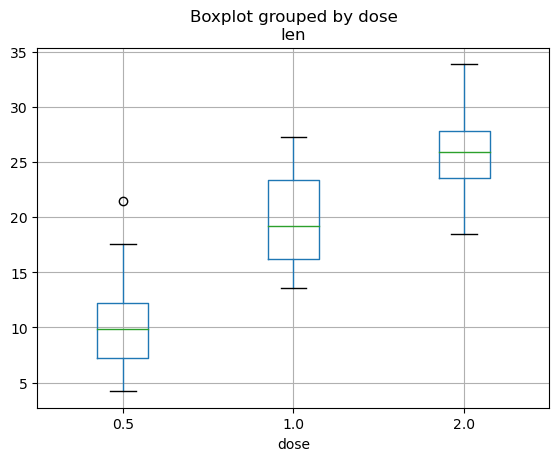

In [31]:
df.boxplot(column = "len", by = "supp")
df.boxplot(column = "len", by = "dose")

In [32]:
statistique , p_value = bartlett(df["len"][df["supp"] == "OJ"], df["len"][df["supp"] == "VC"])
if p_value < 0.05:
    print("Les variances sont différentes")
else:
    print("Les variances sont identiques")

Les variances sont identiques


In [33]:
statistique , p_value = bartlett(df["len"][df["dose"] == 0.5], df["len"][df["dose"] == 1], df["len"][df["dose"] == 2])
if p_value < 0.05:
    print("Les variances sont différentes")
else:
    print("Les variances sont identiques")

Les variances sont identiques


In [34]:
model = ols("len ~ supp + dose", data = df).fit()

# Résidus de la régression
residus = model.resid

# Test de Shapiro-Wilk
statistique, p_valeur = shapiro(residus)

print('Statistique de test:', statistique)

if p_valeur < 0.05:
    print('La p_valeur est', p_valeur, ', les résidus ne suivent pas une loi normale')
else:
    print('La p_valeur est', p_valeur, ', les résidus suivent une loi normale')

# Test sur les valeurs non residuelles
statistique, p_valeur = shapiro(df["len"])

if p_valeur < 0.05:
    print('La p_valeur est', p_valeur, ', les valeurs ne suivent pas une loi normale')
else:
    print('La p_valeur est', p_valeur, ', les valeurs suivent une loi normale')

    

Statistique de test: 0.9553825855255127
La p_valeur est 0.028090208768844604 , les résidus ne suivent pas une loi normale
La p_valeur est 0.10910055041313171 , les valeurs suivent une loi normale


Perform a two-way ANOVA without interaction and conclude.

In [35]:
model = ols("len ~ supp + dose", data = df).fit()

anova_table = anova_lm(model)

print(anova_table)


            df       sum_sq      mean_sq           F        PR(>F)
supp       1.0   205.350000   205.350000   11.446768  1.300662e-03
dose       1.0  2224.304298  2224.304298  123.988774  6.313519e-16
Residual  57.0  1022.555036    17.939562         NaN           NaN


Perform an ANOVA with interaction and conclude

In [36]:
model = ols("len ~ supp * dose", data = df).fit()

anova_table = anova_lm(model)

print(anova_table)

             df       sum_sq      mean_sq           F        PR(>F)
supp        1.0   205.350000   205.350000   12.317020  8.936452e-04
dose        1.0  2224.304298  2224.304298  133.415146  1.907985e-16
supp:dose   1.0    88.920107    88.920107    5.333483  2.463136e-02
Residual   56.0   933.634929    16.672052         NaN           NaN


Analyse the interaction using a multi-comparison and the Tukey's rank test. To perform this, uyou will have to create a new variable concatenating the different madalities of explanatory factors.

In [39]:
df['interaction'] = df['supp'].astype(str) + "_" + df['dose'].astype(str)

mc = MultiComparison(df['len'], df['interaction'])
result = mc.tukeyhsd(alpha=0.05)

print(result.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
OJ_0.5 OJ_1.0     9.47    0.0   4.6719  14.2681   True
OJ_0.5 OJ_2.0    12.83    0.0   8.0319  17.6281   True
OJ_0.5 VC_0.5    -5.25 0.0243 -10.0481  -0.4519   True
OJ_0.5 VC_1.0     3.54  0.264  -1.2581   8.3381  False
OJ_0.5 VC_2.0    12.91    0.0   8.1119  17.7081   True
OJ_1.0 OJ_2.0     3.36 0.3187  -1.4381   8.1581  False
OJ_1.0 VC_0.5   -14.72    0.0 -19.5181  -9.9219   True
OJ_1.0 VC_1.0    -5.93 0.0074 -10.7281  -1.1319   True
OJ_1.0 VC_2.0     3.44 0.2936  -1.3581   8.2381  False
OJ_2.0 VC_0.5   -18.08    0.0 -22.8781 -13.2819   True
OJ_2.0 VC_1.0    -9.29    0.0 -14.0881  -4.4919   True
OJ_2.0 VC_2.0     0.08    1.0  -4.7181   4.8781  False
VC_0.5 VC_1.0     8.79    0.0   3.9919  13.5881   True
VC_0.5 VC_2.0    18.16    0.0  13.3619  22.9581   True
VC_1.0 VC_2.0     9.37    0.0   4.5719  14.1681   True
----------

# Covariance Analysis

We aim to explain now the len variable using both qualitative (supp) and quantitative (dose) variable.

Perform a covariance analysis using 'sm.formula.ols'. The output of the summary() function provides a detailed summary of the ANCOVA model, including the estimated coefficients, standard errors, t-values, and p-values for each independent variable and the covariate, as well as the overall F-statistic and p-value for the ANOVA.

In [ ]:
#ETU

Integrate interactions in the model using the * agregator

In [ ]:
#ETU

Interpret the results.

Comment etud